In [1]:
import torch
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [2]:
n_dim = 2 #2차원 벡터 데이터
x_train, y_train = make_blobs(n_samples=80,n_features=n_dim, centers=[[1,1],[-1,-1],[1,-1],[-1,1]],shuffle=True, cluster_std=0.3)
x_test, y_test = make_blobs(n_samples=20,n_features=n_dim, centers=[[1,1],[-1,-1],[1,-1],[-1,1]],shuffle=True, cluster_std=0.3)

In [3]:
y_train

array([1, 2, 3, 0, 2, 1, 3, 1, 2, 3, 2, 0, 1, 1, 1, 3, 3, 1, 0, 3, 0, 1,
       0, 1, 3, 1, 2, 2, 3, 0, 3, 2, 2, 3, 0, 0, 0, 0, 2, 3, 0, 1, 3, 3,
       2, 1, 0, 2, 2, 3, 2, 1, 0, 3, 3, 0, 2, 0, 1, 0, 2, 1, 1, 3, 1, 3,
       2, 1, 0, 2, 1, 0, 3, 2, 0, 3, 1, 0, 2, 2])

train - 80개, test - 20개 

In [4]:
def label_map(y_, from_,to_):
    y = np.copy(y_)#train or test data 복사
    for f in from_: # 레이블 값 부여
        y[y_ == f] = to_
    return y

In [5]:
y_train = label_map(y_train,[0,1],0)
y_train = label_map(y_train, [2,3],1)
y_test = label_map(y_test, [0,1],0)
y_test = label_map(y_test,[2,3],1)

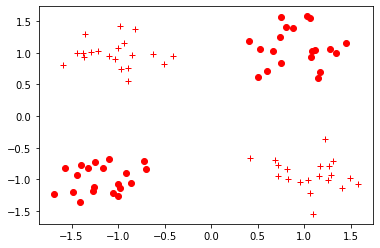

In [6]:
def vis_data(x,y=None, c='r'):
    if y is None:
        y = [None] * len(x)
        
    for x_,y_ in zip(x,y):
        if y_ is None:
            plt.plot(x_[0],x_[1], '*',markerfacecolor='none',markeredgecolor=c)
        else :
            plt.plot(x_[0],x_[1], c+'o' if y_==0 else c+'+')
            
plt.figure()
vis_data(x_train,y_train,c='r')
plt.show()

In [7]:
# 넘파이 벡터 형식 데이터를 토치 텐서로 변환
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

In [8]:
class NeuralNet(torch.nn.Module):
    def __init__(self, input_size, hidden_size): # 객체가 갖는 속성값을 초기화
        super(NeuralNet, self).__init__() #NeuralNet의 nn.Module 클래스 속성들을 가지고 초기화됨
        
        self.input_size = input_size
        self.hidden_size = hidden_size
        
        self.linear_1 = torch.nn.Linear(self.input_size,self.hidden_size) #Linear - 행렬곱과 편향을 포함하는 연산
        self.Relu = torch.nn.ReLU() #활성화 함수
        self.linear_2 = torch.nn.Linear(self.hidden_size, 1) 
        self.sigmoid = torch.nn.Sigmoid() #활성화 함수
        
    def forward(self,input_tensor):
        linear1 = self.linear_1(input_tensor)
        relu = self.Relu(linear1)
        linear2 = self.linear_2(relu)
        output = self.sigmoid(linear2)
        
        return output

In [9]:
model = NeuralNet(2,5) #input = 2 ,hidden = 5
learning_rate = 0.03
criterion = torch.nn.BCELoss() # binary cross entropy
epochs = 2000

In [10]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)#확률적 경사하강법 사용( 새 가중치 = 가중치 - lr*가중치에 대한 기울기)
#model.parameters -> 가중치 학습률 입력

In [11]:
model.eval()
test_loss_before = criterion(model(x_test).squeeze(), y_test)
print("Before training, test loss is {}".format(test_loss_before.item()))

Before training, test loss is 0.7211464047431946


In [12]:
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad() #반복할때마다 경사값 새로 계산하기 위함
    train_output = model(x_train)
    
    train_loss = criterion(train_output.squeeze(),y_train)
    
    if epoch % 100 ==0:
        print("Train loss at {} is {}".format(epoch, train_loss.item()))
        
    train_loss.backward()#오차함수를 가중치로 미분, 오차가 최소가 되는 방향 찾음
    optimizer.step()#모델을 학습률만큼 옮김

Train loss at 0 is 0.7263622879981995
Train loss at 100 is 0.6093682050704956
Train loss at 200 is 0.5172457098960876
Train loss at 300 is 0.4246510863304138
Train loss at 400 is 0.3420720100402832
Train loss at 500 is 0.2768881320953369
Train loss at 600 is 0.22688500583171844
Train loss at 700 is 0.1882120668888092
Train loss at 800 is 0.15817278623580933
Train loss at 900 is 0.13422110676765442
Train loss at 1000 is 0.1149272546172142
Train loss at 1100 is 0.09916886687278748
Train loss at 1200 is 0.08615066856145859
Train loss at 1300 is 0.07531555742025375
Train loss at 1400 is 0.06622824817895889
Train loss at 1500 is 0.058594029396772385
Train loss at 1600 is 0.05211687088012695
Train loss at 1700 is 0.04666828736662865
Train loss at 1800 is 0.04202202335000038
Train loss at 1900 is 0.038029976189136505


In [14]:
model.eval()
test_loss = criterion(model(x_test).squeeze(),y_test)
print('After Training, test loss is {}'.format(test_loss.item()))

After Training, test loss is 0.05179445073008537


In [15]:
#모델 내 가중치를 딕셔너리 형태로 {연산 이름 :" 가중치 텐서와 편향 텐서"}
torch.save(model.state_dict(),'model.pt')
print('state_dict format of the model : {}'.format(model.state_dict()))

state_dict format of the model : OrderedDict([('linear_1.weight', tensor([[-0.6634, -0.4987],
        [ 1.5358, -1.6004],
        [ 0.8019, -0.8380],
        [-1.8953,  1.9174],
        [ 0.6324,  0.8221]])), ('linear_1.bias', tensor([ 0.1510, -0.2621, -0.1340, -0.8939,  0.2192])), ('linear_2.weight', tensor([[-0.7915,  2.1235,  1.0649,  2.7031, -0.9281]])), ('linear_2.bias', tensor([-2.2734]))])


In [21]:
new_model = NeuralNet(2,5)
new_model.load_state_dict(torch.load('model.pt'))
new_model.eval()
print('벡터 [-1,1]이 레이블 1을 가질 확률 {}'.format(new_model(torch.FloatTensor([-1,1])).item()))

벡터 [-1,1]이 레이블 1을 가질 확률 0.9932188391685486


In [23]:
new_model(torch.FloatTensor([-1,0])).item()

0.44738730788230896